In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [2]:
dataset = pd.read_csv('data/preprocessed_dataset.csv', sep=';')

In [3]:
dataset

,overall,reviewText,description,brand,price,asin,preprocessedReviewText
0,5.0,I have read a lot of the reviews and spoken to...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[('i', 'NOUN', 0.0), ('read', 'VERB', 0.0), ('..."
1,4.0,Or maybe not. The good news is that for less ...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[('or', 'CONJ', 0.0), ('maybe', 'ADV', 0.0), (..."
2,4.0,Having previously owned the LG VX9800 (one of ...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[('having', 'VERB', 0.0), ('previously', 'ADV'..."
3,3.0,3.5 stars. I was very excited about the launc...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[('35', 'NUM', 0.0), ('star', 'NOUN', 0.0), ('..."
4,1.0,I want to warn IT professionals that Verizon W...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[('i', 'NOUN', 0.0), ('want', 'VERB', 1.0), ('..."
...,...,...,...,...,...,...,...
17563,5.0,good,"[""The Good The Samsung Galaxy Express runs on ...",Samsung,27.69,B01GQWT4SE,"[('good', 'ADJ', 3.0)]"
17564,4.0,does funny things rarely . like FB will just r...,['The energy XL is a stunning smartphone that ...,BLU,224.96,B01GWUXN5K,"[('funny', 'ADJ', 4.0), ('thing', 'NOUN', 0.0)..."
17565,5.0,Not bad phone,['The energy XL is a stunning smartphone that ...,BLU,224.96,B01GWUXN5K,"[('not', 'ADV', 0.0), ('bad', 'ADJ', -3.0), ('..."
17566,1.0,This phone is no good!! Keeps freezing up. Eve...,['iPhone with iOS 9; Lightning to USB Cable; U...,Apple,40.08,B01GXAT0BK,"[('this', 'DET', 0.0), ('phone', 'NOUN', 0.0),..."


In [4]:
def calculate_review_sentiment_score(x):
    tot = 0
    card = 0
    for word, _, score in x:
        if score != 0:
            tot += score
            card += 1
    
    return tot/card if card != 0 else 0    

In [5]:
from ast import literal_eval
dataset['preprocessedReviewText'] = dataset['preprocessedReviewText'].apply(literal_eval)

In [6]:
dataset['RSS'] = dataset['preprocessedReviewText'].apply(calculate_review_sentiment_score)

I ratings sono da 1 a 5, mentre i sentiment scores da -5 a 5, quindi vengono normalizzati tra 1 e 5 

In [7]:
def normalize_RSS(x):
    norm = 0
    if x >= 3:
        norm = 5

    elif 1 < x <= 3:
        norm = 4

    elif -0.5 < x <= 1:
        norm = 3

    elif -3 < x <= -0.5:
        norm = 2

    elif x <= -3 :
        norm = 1

    return norm

In [8]:
dataset['normalized_RSS'] = dataset['RSS'].apply(normalize_RSS)

In [9]:
dataset.head()

,overall,reviewText,description,brand,price,asin,preprocessedReviewText,RSS,normalized_RSS
0,5.0,I have read a lot of the reviews and spoken to...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[(i, NOUN, 0.0), (read, VERB, 0.0), (lot, NOUN...",1.225806,4
1,4.0,Or maybe not. The good news is that for less ...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[(or, CONJ, 0.0), (maybe, ADV, 0.0), (the, DET...",0.818182,3
2,4.0,Having previously owned the LG VX9800 (one of ...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[(having, VERB, 0.0), (previously, ADV, 0.0), ...",1.136364,4
3,3.0,3.5 stars. I was very excited about the launc...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[(35, NUM, 0.0), (star, NOUN, 0.0), (i, NOUN, ...",0.761905,3
4,1.0,I want to warn IT professionals that Verizon W...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[(i, NOUN, 0.0), (want, VERB, 1.0), (warn, ADP...",-0.125000,3


2. SENTIMENT-ANALYSIS SENTENCE LEVEL

NLTK Punkt Sentence Tokenizer per splittare le reviews in sentences

In [10]:
import nltk
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle') #sentence_tokenizer

In [11]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is alr

True

In [12]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [14]:
import json
from afinn import Afinn

afinn = Afinn()

In [15]:
# Funzione per splittare le recensioni in frasi
def preprocess_analyze_sentences(review):
    sentences_sentiments = {}
    sentences = tokenizer.tokenize(review)
    
    for sentence in sentences:
        afinn_scores = []
        sentence_clean = re.sub(r'[^\w\s]', '', sentence) #cleaning
        # Tokenizza in parole
        words = nltk.word_tokenize(sentence_clean)
        # Rimuovi stopwords e applica lemmatization
        preprocessed_words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in stop_words]
        for word in preprocessed_words:
            score = afinn.score(word)
            if score != 0:
                afinn_scores.append(score)
        # Ricostruisci la frase preprocessata come stringa
        preprocessed_sentence = ' '.join(preprocessed_words)
        # Calcola il sentiment
        sentences_sentiments[preprocessed_sentence] = normalize_RSS((sum(afinn_scores)/len(afinn_scores))) if len(afinn_scores) != 0 else normalize_RSS(0)
        #sentences_sentiments.append((preprocessed_sentence, (sum(afinn_scores)/len(afinn_scores)) if len(afinn_scores) != 0 else 0))

    return sentences_sentiments

# Funzione per combinare tutti i dizionari di sentences per ogni 'asin'
def combine_sentences(sent_dicts):
    combined_dict = {}
    for d in sent_dicts:
        combined_dict.update(d)
    return combined_dict

In [16]:
r = """This cell phone has passed the proof of time under really really tough conditions. . . . .Great
things: 1. Signal: Superb, I have had many cell phones before, including Nokia which I think has a great signal,
but HTC TYTN II has much better signal. This one sustains signal in elevators while my Nokia can’t . . . . 3.
Screen: Touch screen works really well. Tilting (40 degrees) screen is nice and comfortable to work with when
you are writing over the table. 4. Sliding QWERTY keyboard is the main reason to buy it for us who don’t like
front keyboards, this makes the phone a little bulky but is great. 5. Plenty of buttons: Has plenty of buttons that
make it easy to operate. The 360 degree 3 way jog wheel paired with OK button (left side) is fantastic, great option
to operate the phone while you are driving. 6. Setting e-mail/sms accounts was really easy and fast . . . ..Good
things: 1. Processor: 400 MHz, works OK, it is not super-fast but certainly it is not slow. Phone turns on fast
(less than 1 minute to operate). 2. Platform: Windows mobile 6 is good. Until date I have had to re-start the
phone 3 or 4 times due to system fail (unable to detect end call), besides this it has worked well. 3. Camera 3
mega-pixels: Has good definition, works precisely. 4. HTC Home screen is nice, very interactive. . . . Not so
Good: 1. Camera: Does not have flash, so don’t expect to get good inside pictures. 2. Battery: Weak point, don’t
expect your battery to last more than 24 hours, and much less if you use it heavily. Requires car charger, charge
through USB. 3. Speaker: It is not so loud . . ."""

preprocess_analyze_sentences(r)

{'this cell phone passed proof time really really tough condition': 3,
 '': 3,
 'great thing 1': 5,
 'signal superb i many cell phone including nokia i think great signal htc tytn ii much better signal': 5,
 'this one sustains signal elevator nokia cant': 3,
 '3': 3,
 'screen touch screen work really well': 3,
 'tilting 40 degree screen nice comfortable work writing table': 4,
 '4': 3,
 'sliding qwerty keyboard main reason buy u dont like front keyboard make phone little bulky great': 4,
 '5': 3,
 'plenty button ha plenty button make easy operate': 4,
 'the 360 degree 3 way jog wheel paired ok button left side fantastic great option operate phone driving': 5,
 '6': 3,
 'setting emailsms account really easy fast': 3,
 'good thing 1': 5,
 'processor 400 mhz work ok superfast certainly slow': 3,
 'phone turn fast le 1 minute operate': 3,
 '2': 3,
 'platform window mobile 6 good': 5,
 'until date i restart phone 3 4 time due system fail unable detect end call besides worked well': 2,
 'cam

In [17]:
# Aggiungere il campo features basato sulla lista di features
def extract_features(sent_dict, features_list):
    feature_sentiments = {}
    for feature in features_list:
        feature_values = [sentiment for sentence, sentiment in sent_dict.items() if feature in sentence]
        if feature_values:
            feature_sentiments[feature] = sum(feature_values) / len(feature_values)
    return feature_sentiments


In [18]:
%%time
filtered_features = pd.read_csv('data/ontology_filtered.csv', sep=";")
# Applicare la funzione a ogni recensione e raggruppare per 'asin'
dataset['preprocessed_sentences'] = dataset['reviewText'].apply(preprocess_analyze_sentences)

# Raggruppare per 'asin' e combinare le sentences
grouped = dataset.groupby('asin')['preprocessed_sentences'].apply(list).reset_index()
grouped['preprocessed_sentences'] = grouped['preprocessed_sentences'].apply(combine_sentences)
grouped['features'] = grouped['preprocessed_sentences'].apply(lambda x: extract_features(x, filtered_features['value']))

result = grouped.to_dict(orient='records')

CPU times: total: 27.3 s
Wall time: 28.9 s


In [19]:
# Salva il risultato in un file JSON
with open('data/features_scores.json', 'w') as f:
    json.dump(result, f, indent=4)

In [20]:
scores_df = dataset.groupby('asin')['normalized_RSS'].mean().reset_index()

In [21]:
scores_df['star_rating'] = dataset.groupby('asin')['overall'].mean().reset_index()['overall']
scores_df['price'] = dataset.groupby('asin')['price'].mean().reset_index()['price']


In [22]:
scores_df.head()

,asin,normalized_RSS,star_rating,price
0,B000FYU4SO,3.200000,3.300000,17.99
1,B000G2TLIO,3.705882,3.882353,27.57
2,B000G7LZCO,3.909091,4.181818,105.99
3,B000PEOLAG,4.333333,4.833333,74.98
4,B000WA1ESK,3.000000,4.333333,18.97


In [36]:
def extract_FSS(dict):
    FSS = []
    for e in dict:
        values = [f for f in list(e['features'].values()) ]
        mean = sum(values)/len(values) if len(values) != 0 else 1
        FSS.append(mean)

    return FSS

In [37]:
scores_df['FSS'] = extract_FSS(result)

In [38]:
scores_df

,asin,normalized_RSS,star_rating,price,FSS,global_score
0,B000FYU4SO,3.200000,3.300000,17.99,3.060676,0.560715
1,B000G2TLIO,3.705882,3.882353,27.57,3.373538,0.689307
2,B000G7LZCO,3.909091,4.181818,105.99,3.491071,0.705065
3,B000PEOLAG,4.333333,4.833333,74.98,3.634615,0.840735
4,B000WA1ESK,3.000000,4.333333,18.97,3.400000,0.630929
...,...,...,...,...,...,...
433,B01GQWT4SE,3.956522,4.043478,27.69,3.250000,0.730868
434,B01GUFAFP8,3.285714,2.714286,16.00,3.270833,0.538969
435,B01GWUXN5K,3.611111,3.888889,224.96,3.407841,0.570700
436,B01GXAT0BK,3.788462,4.307692,40.08,3.292196,0.723317


In [39]:
scores_df.describe()

,normalized_RSS,star_rating,price,FSS,global_score
count,438.000000,438.000000,438.000000,438.000000,438.000000
mean,3.811046,4.150085,90.161507,3.368425,0.690503
std,0.291335,0.450433,80.353841,0.352758,0.082489
min,2.900000,2.454545,13.950000,1.000000,0.393103
25%,3.662990,3.894139,40.080000,3.227583,0.645422
50%,3.818182,4.200000,59.760000,3.373400,0.693585
75%,4.000000,4.442884,117.615000,3.523315,0.743604
max,4.666667,5.000000,550.780000,4.750000,0.945026


In [40]:
min_RSS = min(scores_df['normalized_RSS'])
min_FSS = min(scores_df['FSS'])
max_RSS = max(scores_df['normalized_RSS'])
max_FSS = max(scores_df['FSS'])
min_star = min(scores_df['star_rating'])
max_star = max(scores_df['star_rating'])
max_price = max(scores_df['price'])

norm_RSS = (scores_df['normalized_RSS'] - min_RSS)/(max_RSS - min_RSS)
norm_FSS = (scores_df['FSS'] - min_FSS)/(max_FSS - min_FSS)
norm_star = (scores_df['star_rating'] - min_star)/(max_star - min_star)
norm_price = (max_price - scores_df['price'] + 1)/max_price

scores_df['global_score'] = norm_price * 0.3 + norm_star * 0.2 + norm_RSS * 0.25 + norm_FSS * 0.25
    

In [41]:
#top 5 products by global score
scores_df.sort_values(by='global_score', ascending=False)[:5]

,asin,normalized_RSS,star_rating,price,FSS,global_score
107,B008LR0TWI,4.500000,5.000000,27.57,4.428571,0.940514
274,B00NWRD6MC,4.500000,5.000000,49.98,4.375000,0.924737
420,B01EVMZMZU,4.500000,5.000000,59.16,4.444444,0.924366
47,B004ZMC7NC,4.250000,5.000000,38.88,4.000000,0.870405
273,B00NWR268W,4.666667,4.666667,49.99,3.591398,0.869885


In [42]:
scores_df.describe()

,normalized_RSS,star_rating,price,FSS,global_score
count,438.000000,438.000000,438.000000,438.000000,438.000000
mean,3.811046,4.150085,90.161507,3.368425,0.671473
std,0.291335,0.450433,80.353841,0.352758,0.084236
min,2.900000,2.454545,13.950000,1.000000,0.370902
25%,3.662990,3.894139,40.080000,3.227583,0.625359
50%,3.818182,4.200000,59.760000,3.373400,0.674402
75%,4.000000,4.442884,117.615000,3.523315,0.724807
max,4.666667,5.000000,550.780000,4.750000,0.940514


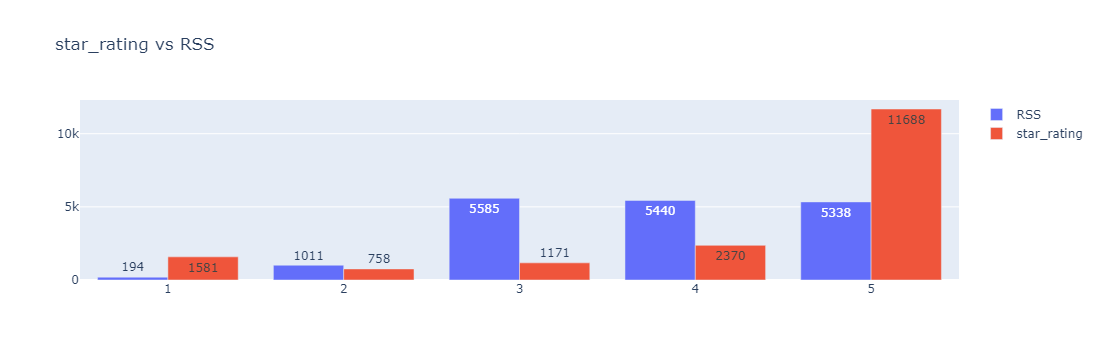

In [43]:
overall_counts = dataset['overall'].value_counts()
RSS_counts = dataset['normalized_RSS'].value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(x=RSS_counts.index, y=RSS_counts.values,
                #base=[-500,-600,-700],
                #marker_color='green',
                text=RSS_counts.values,
                name='RSS',
                #texttemplate='%{text:.2f}',
                textposition='auto',
                ))
fig.add_trace(go.Bar(x=overall_counts.index, y=overall_counts.values,
                #base=[-500,-600,-700],
                #marker_color='green',
                text=overall_counts.values,
                name='star_rating',
                #texttemplate='%{text:.2f}',
                textposition='auto',
                ))


fig.update_layout(
    title = 'star_rating vs RSS'
)
fig.show()

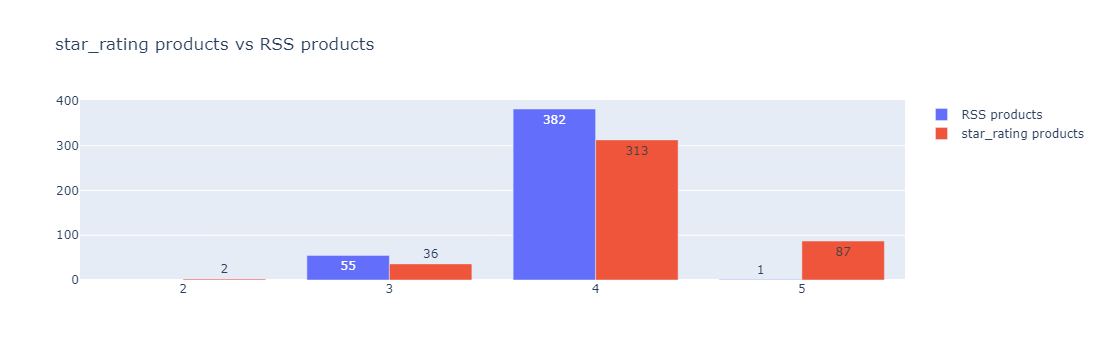

In [44]:
rss_products = scores_df['normalized_RSS'].round().value_counts()
star_products = scores_df['star_rating'].round().value_counts()

fig = go.Figure()
fig.add_trace(go.Bar(x=rss_products.index, y=rss_products.values,
                #base=[-500,-600,-700],
                #marker_color='green',
                text=rss_products.values,
                name='RSS products',
                #texttemplate='%{text:.2f}',
                textposition='auto',
                ))

fig.add_trace(go.Bar(x=star_products.index, y=star_products.values,
                #base=[-500,-600,-700],
                #marker_color='green',
                text=star_products.values,
                name='star_rating products',
                #texttemplate='%{text:.2f}',
                textposition='auto',
                ))

fig.update_layout(
    title = 'star_rating products vs RSS products'
)
fig.show()

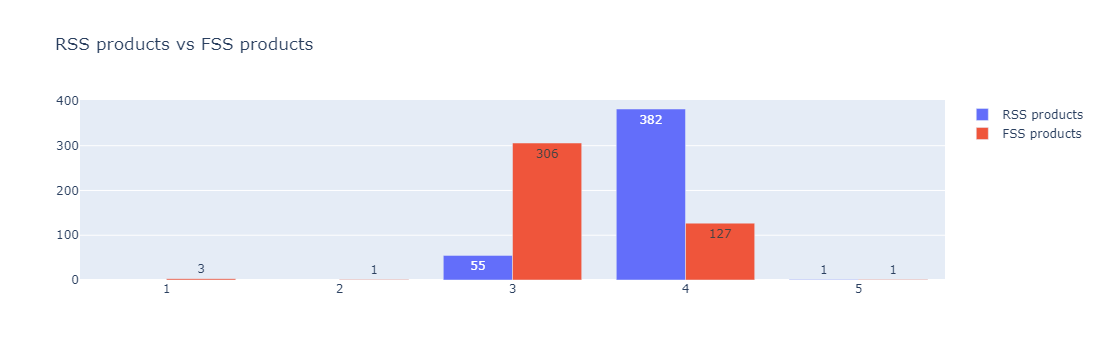

In [45]:
fss_products = scores_df['FSS'].round().value_counts()

fig = go.Figure()
fig.add_trace(go.Bar(x=rss_products.index, y=rss_products.values,
                #base=[-500,-600,-700],
                #marker_color='green',
                text=rss_products.values,
                name='RSS products',
                #texttemplate='%{text:.2f}',
                textposition='auto',
                ))

fig.add_trace(go.Bar(x=fss_products.index, y=fss_products.values,
                #base=[-500,-600,-700],
                #marker_color='green',
                text=fss_products.values,
                name='FSS products',
                #texttemplate='%{text:.2f}',
                textposition='auto',
                ))

fig.update_layout(
    title = 'RSS products vs FSS products'
)
fig.show()

In [46]:
def create_circular_mask(diameter):
    x, y = np.ogrid[:diameter, :diameter]
    center = (diameter - 1) / 2
    mask = (x - center) ** 2 + (y - center) ** 2 > center ** 2
    return 255 * mask.astype(int)

# Dimensione della maschera
diameter = 400

# Creazione della maschera circolare
circular_mask = create_circular_mask(diameter)

## DASHBOARDS

In [54]:
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud

def plot_features_wc(asin):
    for product in result:
        if(product['asin'] == asin):
            pos_features = {k: v for k, v in product['features'].items() if v > 3}
            neg_features = {k: v for k, v in product['features'].items() if v < 3}

    # Definizione della palette di colori personalizzata
    colors = ["#FF5733", "#33FF57", "#3357FF"]
    cmap = LinearSegmentedColormap.from_list("custom_palette", colors)
    
    # Generate the word cloud
    pos_wordcloud = WordCloud(mask=circular_mask, relative_scaling=0,width=600, height=400, colormap=cmap, background_color='white').generate_from_frequencies(frequencies=pos_features)
    neg_wordcloud = WordCloud(mask=circular_mask, relative_scaling=0,width=600, height=400,colormap=cmap, background_color='white').generate_from_frequencies(frequencies=neg_features)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(pos_wordcloud, interpolation='bilinear')
    axs[0].axis('off')  # Nascondi gli assi
    axs[0].set_title('positive features')

    axs[1].imshow(neg_wordcloud, interpolation='bilinear')
    axs[1].axis('off')  # Nascondi gli assi
    axs[1].set_title('negative features')
    
    plt.tight_layout()
    plt.show()

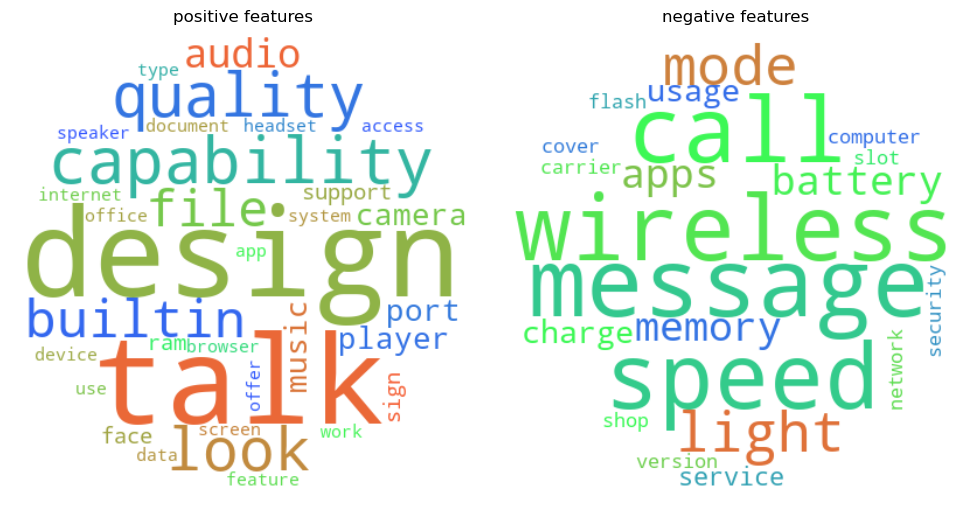

In [55]:
plot_features_wc(result[0]['asin'])

In [57]:
def top_k_products_by_feature(feature, k):
    p = [(product['asin'],product['features'][feature]) for product in result if feature in product['features'].keys()]
    top_K = sorted(p, key=lambda x: x[1], reverse=True)[:k]
    return top_K

In [58]:
top_k_products_by_feature('charger',25)

[('B005KMCLIW', 5.0),
 ('B005Z32UI2', 5.0),
 ('B00X4G7O06', 5.0),
 ('B0147LDSG0', 5.0),
 ('B016V8MYYO', 5.0),
 ('B001OD2OAQ', 4.0),
 ('B003YHOXFY', 4.0),
 ('B004VRJ036', 4.0),
 ('B00578HQAW', 4.0),
 ('B009ZC91AY', 4.0),
 ('B00BV1MVJ0', 4.0),
 ('B00D8T9QZU', 4.0),
 ('B00E1TF21I', 4.0),
 ('B00EW1MUII', 4.0),
 ('B00GWR373M', 4.0),
 ('B00HAMRFQS', 4.0),
 ('B00JFLS8B8', 4.0),
 ('B00RKN0IAC', 4.0),
 ('B00YA8308M', 4.0),
 ('B00ZVNQAA0', 4.0),
 ('B01CNPTKLE', 4.0),
 ('B01DC453ES', 4.0),
 ('B01E5TOIKO', 4.0),
 ('B01E5UCWYW', 4.0),
 ('B00ECBVNWC', 3.75)]

In [59]:
def top_k_features(product_asin,k): 
    features = [product['features'] for product in result if product['asin']==product_asin][0]
    return {k:v for k, v in sorted(features.items(), key=lambda item: item[1], reverse=True)[:5]}
    #top_K = sorted(features, key=lambda x: x[1], reverse=True)[:k]
    #return features

In [60]:
top_k_features(result[0]['asin'],5)

{'design': 4.5, 'talk': 4.0, 'capability': 4.0, 'quality': 4.0, 'look': 4.0}